In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import seaborn as sns
import FinancialMachineLearning as fml

### Chapter 10. Bet Sizing

#### Exercise 1
10.3절의 공식을 사용해, $\lVert X \rVert = 2, 3, \dots, 10$일 때 베팅 크기를 최대 예측 확률의 함수로 그려라

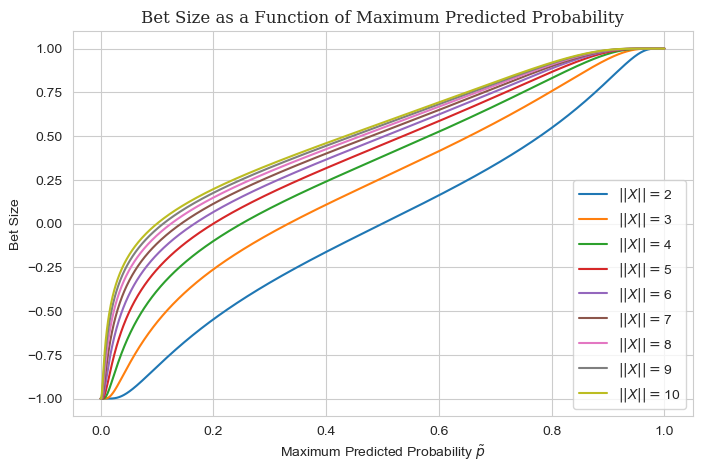

In [2]:
from scipy.stats import norm
p = np.linspace(0, 1, 1000)
fig, ax = plt.subplots(figsize=(8, 5))
for X_size in range(2, 11):
    z = (p - 1 / X_size) / (p * (1 - p)) ** 0.5
    ax.plot(p, 2 * norm.cdf(z) - 1, label=f'$||X||=${X_size}')
ax.set_xlabel(r'Maximum Predicted Probability $\tilde{p}$')
ax.set_ylabel('Bet Size')
ax.legend(loc='best')
ax.set_title('Bet Size as a Function of Maximum Predicted Probability', fontfamily = 'Serif')
plt.show()

#### Exercise 2
$U[0.5, 1.0]$ 범위 내에서 10,000개의 랜덤 숫자를 균등 분포로부터 추출하라

In [3]:
prediction = np.random.uniform(0.5, 1.0, size=10000)

**(a)** $\lVert X \rVert = 2$에 대해 베팅 크기를 게산하라

In [4]:
sides = np.array([(-1) ** i for i in range(10000)])
z = (prediction - 1 / 2) / (prediction * (1 - prediction)) ** 0.5

**(b)** 10,000개의 연속된 캘린더 날짜를 베팅 크기에 할당하라

In [5]:
bet_size = pd.Series(data = sides * (2 * norm.cdf(z) - 1), index = pd.date_range(start = '2/1/1985', periods = 10000, freq = 'B'))
bet_size

1985-02-01    0.100371
1985-02-04   -0.491655
1985-02-05    0.514416
1985-02-06   -0.263147
1985-02-07    0.903785
                ...   
2023-05-26   -0.069408
2023-05-29    0.571822
2023-05-30   -0.232458
2023-05-31    0.480576
2023-06-01   -0.975164
Freq: B, Length: 10000, dtype: float64

**(c)** $U[1, 25]$ 범위 내에서 10,000개의 랜덤 숫자를 균등 분포로부터 추출하라

In [6]:
prediction = np.random.uniform(1, 25, size=10000)

**(d)** 2.b에 있는 날짜를 인덱스로 갖고, 값으로 2.c의 날짜 수만큼 앞으로 이동된 인덱스를 갖는 pandas.Series를 만들어라. 이는 3장에서 사용한 것과 유사한 `t1` 객체다

In [7]:
from datetime import timedelta
shift = pd.Series(data = prediction * timedelta(days=1) + pd.date_range(start = '2/1/1985', periods = 10000, freq = 'B'),
                   index = pd.date_range(start = '2/1/1985', periods = 10000, freq = 'B'))
signals = shift.to_frame(name='t1')
signals['signal'] = bet_size
signals

,t1,signal
1985-02-01,1985-02-08 05:32:15.105457,0.100371
1985-02-04,1985-02-28 15:02:58.426449,-0.491655
1985-02-05,1985-02-16 11:49:22.195509,0.514416
1985-02-06,1985-02-22 17:20:53.675689,-0.263147
1985-02-07,1985-03-02 18:38:03.645795,0.903785
...,...,...
2023-05-26,2023-06-09 12:58:06.356190,-0.069408
2023-05-29,2023-06-22 19:52:15.396602,0.571822
2023-05-30,2023-06-01 12:25:11.934522,-0.232458
2023-05-31,2023-06-10 22:56:19.119114,0.480576


**(e)** 10.4절을 따라 평균 실행 중인 베팅을 계산하라

In [8]:
avg_signal = fml.avg_active_signals(signals)
avg_signal

1985-02-01 00:00:00.000000    0.100371
1985-02-04 00:00:00.000000   -0.195642
1985-02-05 00:00:00.000000    0.041044
1985-02-06 00:00:00.000000   -0.035004
1985-02-07 00:00:00.000000    0.152754
                                ...   
2023-06-10 22:56:19.119114   -0.047138
2023-06-13 02:05:57.948256    0.017295
2023-06-14 15:17:39.954967   -0.201671
2023-06-20 02:21:29.530379    0.571822
2023-06-22 19:52:15.396602    0.000000
Length: 20000, dtype: float64

#### Exercise 3
Exercise 2.d의 `t1` 객체를 사용하라

In [9]:
for i in signals.index :
    signals.loc[i, 'long_concurrency'], signals.loc[i, 'short_concurrency'] = fml.get_num_conc_bets_by_date(date = i, signals = signals, freq = 'B')
signals

,t1,signal,long_concurrency,short_concurrency
1985-02-01,1985-02-08 05:32:15.105457,0.100371,1.0,0.0
1985-02-04,1985-02-28 15:02:58.426449,-0.491655,1.0,1.0
1985-02-05,1985-02-16 11:49:22.195509,0.514416,2.0,1.0
1985-02-06,1985-02-22 17:20:53.675689,-0.263147,2.0,2.0
1985-02-07,1985-03-02 18:38:03.645795,0.903785,3.0,2.0
...,...,...,...,...
2023-05-26,2023-06-09 12:58:06.356190,-0.069408,5.0,7.0
2023-05-29,2023-06-22 19:52:15.396602,0.571822,5.0,5.0
2023-05-30,2023-06-01 12:25:11.934522,-0.232458,5.0,5.0
2023-05-31,2023-06-10 22:56:19.119114,0.480576,6.0,5.0


**(a)** 최대 공존 롱 베팅 개수 $\bar{c}_l$을 결정하라

In [10]:
signals['long_concurrency'].max()

9.0

**(b)** 최대 공존 숏 베팅 개수 $\bar{c}_s$를 결정하라

In [11]:
signals['short_concurrency'].max()

9.0

**(c)** 베팅 크기를 $m_t = c_{t,l} \frac{1}{\bar{c}_l} - c_{t,s} \frac{1}{\bar{c}_s}$로 유도하라. 여기서 $c_{t,l}$은 시점 $t$에서의 concurrent long betting 개수, $c_{t,s}$는 시점 $t$에서의 concurrent short betting 개수다

In [12]:
signals['bet_size'] = signals['long_concurrency'] / signals['long_concurrency'].max() - signals['short_concurrency'] / signals['short_concurrency'].max()
signals

,t1,signal,long_concurrency,short_concurrency,bet_size
1985-02-01,1985-02-08 05:32:15.105457,0.100371,1.0,0.0,0.111111
1985-02-04,1985-02-28 15:02:58.426449,-0.491655,1.0,1.0,0.000000
1985-02-05,1985-02-16 11:49:22.195509,0.514416,2.0,1.0,0.111111
1985-02-06,1985-02-22 17:20:53.675689,-0.263147,2.0,2.0,0.000000
1985-02-07,1985-03-02 18:38:03.645795,0.903785,3.0,2.0,0.111111
...,...,...,...,...,...
2023-05-26,2023-06-09 12:58:06.356190,-0.069408,5.0,7.0,-0.222222
2023-05-29,2023-06-22 19:52:15.396602,0.571822,5.0,5.0,0.000000
2023-05-30,2023-06-01 12:25:11.934522,-0.232458,5.0,5.0,0.000000
2023-05-31,2023-06-10 22:56:19.119114,0.480576,6.0,5.0,0.111111


#### Exercise 4
Exercise 2.d의 `t1` 객체를 이용하라

In [13]:
signals['t1']

1985-02-01   1985-02-08 05:32:15.105457
1985-02-04   1985-02-28 15:02:58.426449
1985-02-05   1985-02-16 11:49:22.195509
1985-02-06   1985-02-22 17:20:53.675689
1985-02-07   1985-03-02 18:38:03.645795
                        ...            
2023-05-26   2023-06-09 12:58:06.356190
2023-05-29   2023-06-22 19:52:15.396602
2023-05-30   2023-06-01 12:25:11.934522
2023-05-31   2023-06-10 22:56:19.119114
2023-06-01   2023-06-20 02:21:29.530379
Freq: B, Name: t1, Length: 10000, dtype: datetime64[ns]

**(a)** 계열 $c_t = c_{t,l}-c_{t,s}$를 계산하라. 여기서 $c_{t,l}$은 시점 $t$에서의 concurrent long betting 개수, $c_{t,s}$는 시점 $t$에서의 concurrent short betting 개수다

In [14]:
c_t = signals['long_concurrency'] - signals['short_concurrency']
c_t

1985-02-01    1.0
1985-02-04    0.0
1985-02-05    1.0
1985-02-06    0.0
1985-02-07    1.0
             ... 
2023-05-26   -2.0
2023-05-29    0.0
2023-05-30    0.0
2023-05-31    1.0
2023-06-01    0.0
Freq: B, Length: 10000, dtype: float64

**(b)** $\{c_t\}$에 두 Gaussian Distribution의 혼합을 적합화하라. López de Prado and Foreman(2014)에 설명된 방법을 사용하는 것도 괜찮다

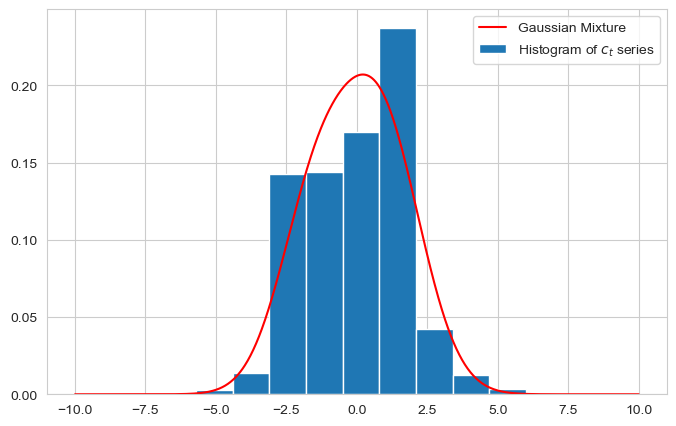

In [15]:
from sklearn.mixture import GaussianMixture

mixture = GaussianMixture(n_components = 2).fit(c_t.values.reshape(-1, 1))
fig, ax = plt.subplots(figsize = (8, 5))
x = np.linspace(-10, 10, 1000).reshape(-1, 1)
logprob = mixture.score_samples(x)
pdf = np.exp(logprob)
ax.plot(x, pdf, color = 'red', label = 'Gaussian Mixture')
ax.hist(c_t.values, density = True, label = r'Histogram of $c_t$ series')
ax.legend(loc = 'best')
plt.show()

**(c)** Bet size를 $m_t = \begin{cases} \frac{F[c_t] - F[0]}{1 - F[0]}, & \mbox{if } c_t \leq 0 \\ \frac{F[c_t] - F[0]}{F[0]}, & \mbox{if }c_t < 0 \end{cases}$로 유도하라. 여기서 $F[x]$는 값 $x$에 대해 두 Gaussian Distribution의 적합화된 fitted mixture of two Gaussian CDF이다

In [16]:
x0 = np.linspace(-15, 0, 1000).reshape(-1, 1)
logprob = mixture.score_samples(x0)
F_0 = np.exp(logprob).sum() * 15 / 1000    # have to normalize pdf
for i in signals.index:
    x1 = np.linspace(-15, c_t[i], 1000).reshape(-1, 1)
    logprob = mixture.score_samples(x1)
    F_c = np.exp(logprob).sum() * (c_t[i] + 15) / 1000
    if c_t[i] >= 0:
        signals.loc[i, 'bet_size_gaussian'] = (F_c - F_0) / (1 - F_0)
    else:
        signals.loc[i, 'bet_size_gaussian'] = (F_c - F_0) / F_0

signals

,t1,signal,long_concurrency,short_concurrency,bet_size,bet_size_gaussian
1985-02-01,1985-02-08 05:32:15.105457,0.100371,1.0,0.0,0.111111,0.408072
1985-02-04,1985-02-28 15:02:58.426449,-0.491655,1.0,1.0,0.000000,0.000000
1985-02-05,1985-02-16 11:49:22.195509,0.514416,2.0,1.0,0.111111,0.408072
1985-02-06,1985-02-22 17:20:53.675689,-0.263147,2.0,2.0,0.000000,0.000000
1985-02-07,1985-03-02 18:38:03.645795,0.903785,3.0,2.0,0.111111,0.408072
...,...,...,...,...,...,...
2023-05-26,2023-06-09 12:58:06.356190,-0.069408,5.0,7.0,-0.222222,-0.711295
2023-05-29,2023-06-22 19:52:15.396602,0.571822,5.0,5.0,0.000000,0.000000
2023-05-30,2023-06-01 12:25:11.934522,-0.232458,5.0,5.0,0.000000,0.000000
2023-05-31,2023-06-10 22:56:19.119114,0.480576,6.0,5.0,0.111111,0.408072


**(d)** 계열 $\{m_t\}$가 연습 문제 3에서 계산한 베팅 크기 계열과 어떻게 다른지 설명하라

concurrent betting을 사용하는 fixed Gaussian과 방법에 따른 베팅 크기가 베팅 측면에서 일치한다는 것을 알 수 있다. 그러나 Gaussian Mixture는 각 베팅에 대한 높은 신뢰를 의미하는 더 큰 절대 베팅을 생산한다

#### Exericse 5
Exercise 1을 반복하라. 여기서 $m$을 `stepsize = .01, stepSize = .05, stepSize = .1`로 이산화하라

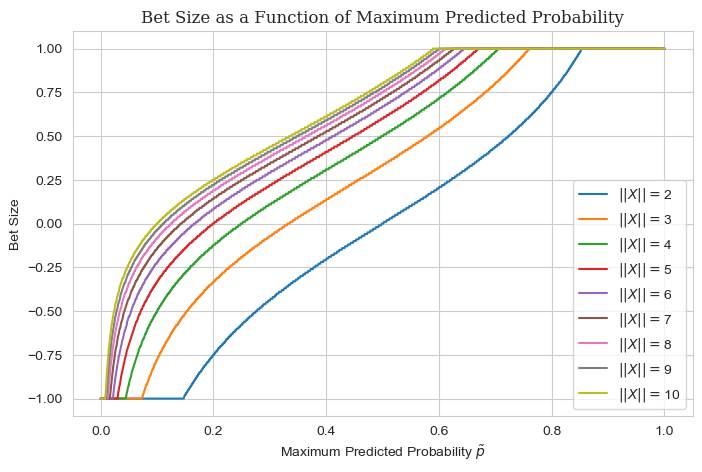

In [17]:
p = np.linspace(0, 1, 1000)
fig, ax = plt.subplots(figsize=(8, 5))
for X_size in range(2, 11):
    z = (p - 1 / X_size) / (p * (1 - p)) ** 0.5
    ax.plot(p, fml.discrete_signal(signal0 = z, stepSize = .01), label=f'$||X||=${X_size}')
ax.set_xlabel(r'Maximum Predicted Probability $\tilde{p}$')
ax.set_ylabel('Bet Size')
ax.legend(loc='best')
ax.set_title('Bet Size as a Function of Maximum Predicted Probability', fontfamily = 'Serif')
plt.show()

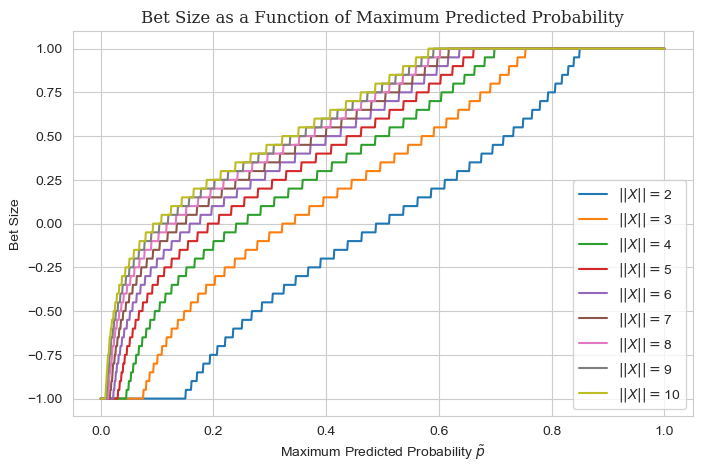

In [18]:
p = np.linspace(0, 1, 1000)
fig, ax = plt.subplots(figsize=(8, 5))
for X_size in range(2, 11):
    z = (p - 1 / X_size) / (p * (1 - p)) ** 0.5
    ax.plot(p, fml.discrete_signal(signal0 = z, stepSize = .05), label=f'$||X||=${X_size}')
ax.set_xlabel(r'Maximum Predicted Probability $\tilde{p}$')
ax.set_ylabel('Bet Size')
ax.legend(loc='best')
ax.set_title('Bet Size as a Function of Maximum Predicted Probability', fontfamily = 'Serif')
plt.show()

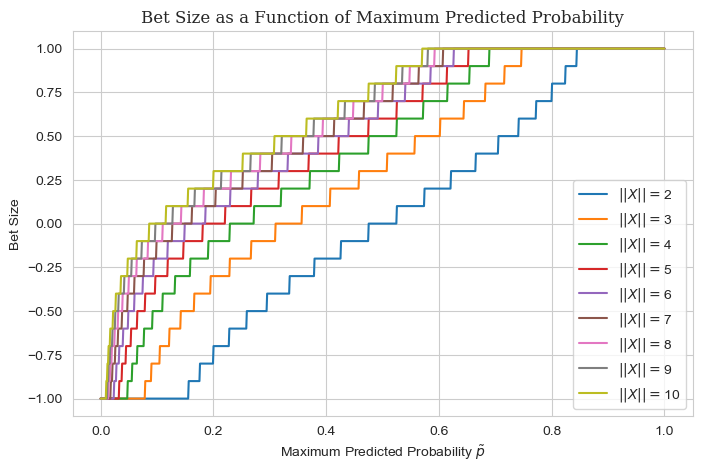

In [19]:
p = np.linspace(0, 1, 1000)
fig, ax = plt.subplots(figsize=(8, 5))
for X_size in range(2, 11):
    z = (p - 1 / X_size) / (p * (1 - p)) ** 0.5
    ax.plot(p, fml.discrete_signal(signal0 = z, stepSize = .1), label=f'$||X||=${X_size}')
ax.set_xlabel(r'Maximum Predicted Probability $\tilde{p}$')
ax.set_ylabel('Bet Size')
ax.legend(loc='best')
ax.set_title('Bet Size as a Function of Maximum Predicted Probability', fontfamily = 'Serif')
plt.show()

#### Exercise 6
10.6절의 식을 다시 작성하라. 베팅 크기를 sigmoid function이 아니라 power function으로 결정하라

$q_t$를 현재 포지션, $Q$는 최대 포지션 크기, $\hat{q}_{i,t}$는 예측 $f_i$와 연계된 목표 포지션 크기라고 하면 다음 식을 만족한다

$$\hat{q}_{i,t} = \mathrm{int}[m[\omega, f_i - p_t]Q]$$
$$m[\omega, x] = \frac{x}{\sqrt{\omega +x^2}}$$

여기서 $m[\omega, x]$는 베팅 크기, $x = f_i - p_t$는 현재 시장 가격과 예측 가격 간의 괴리, $\omega$는 sigmoid function의 범위를 통계하는 계수, $\mathrm{int}[x]$는 $x$의 정수값이다.

시그모이드 함수의 대안으로 power function $\tilde{m}[\omega, x] = \mathrm{sgn}[x][x]^\omega $를 사용할 수 있는데, 여기서 $\omega \leq 0, x \in [-1, 1]$이고, 이는 $\tilde{m}[\omega, x] \in [-1, 1]$의 결과를 낸다

#### Exercise 7

코드 10.4를 수정해 Exercise 6에서 도출한 식을 구현하라

In [20]:
def betSize(x: float, w: float): return w * ((x + w ** 2) ** (-0.5))

def betSizePower(x: float, w: float): return np.sign(w) * abs(w) ** x

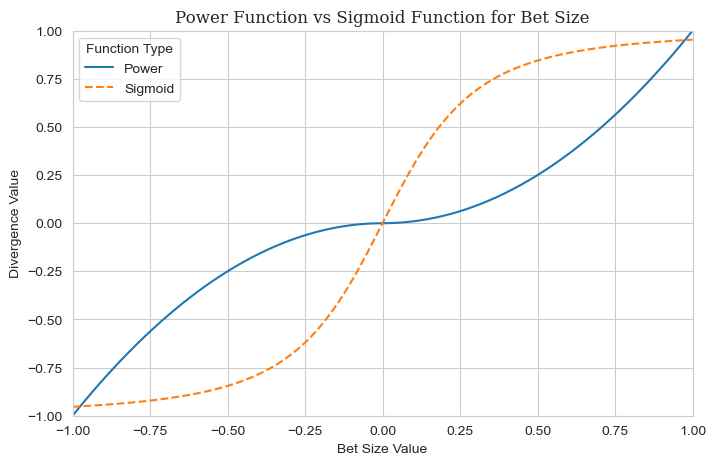

In [21]:
market_price, forecast_price, width_params = 100., 115., {'divergence': 10, 'm_bet_size': .95}
n_points = 1000
X = np.linspace(-1.0, 1.0, 10000)

w = 2
power_function = np.array([betSizePower(2, xi) for xi in X])
sigmoid_function = np.array([betSize(0.1, xi) for xi in X])
bet_size_df = pd.DataFrame({'power': power_function, 'sigmoid': sigmoid_function})
plt.figure(figsize=(8,5))
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.plot(X, bet_size_df["power"], label = "Power")
plt.plot(X, bet_size_df["sigmoid"], label = "Sigmoid", ls = "--")
plt.ylabel("Divergence Value")
plt.xlabel("Bet Size Value")
plt.title("Power Function vs Sigmoid Function for Bet Size", fontfamily = 'Serif')
plt.legend(title = "Function Type")
plt.show()